In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Define data paths
data_dir = Path('datasets')
train_path = data_dir / 'train.csv'
test_path = data_dir / 'test.csv'
submission_path = data_dir / 'sample_submission.csv'

print("=== INITIAL DATASET EXPLORATION ===")
print(f"Train file size: {train_path.stat().st_size / (1024*1024):.1f} MB")
print(f"Test file size: {test_path.stat().st_size / (1024*1024):.1f} MB")
print(f"Submission file size: {submission_path.stat().st_size / (1024*1024):.1f} MB")


=== INITIAL DATASET EXPLORATION ===
Train file size: 31.9 MB
Test file size: 9.0 MB
Submission file size: 7.2 MB


In [2]:
# Load datasets
print("Loading datasets...")
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

print(f"\nTrain dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")
print(f"Submission dataset shape: {submission_df.shape}")

print("\n=== TRAIN DATASET FIRST 5 ROWS ===")
display(train_df.head())

print("\n=== TEST DATASET FIRST 5 ROWS ===")
display(test_df.head())

print("\n=== SAMPLE SUBMISSION ===")
display(submission_df.head())


Loading datasets...

Train dataset shape: (750000, 10)
Test dataset shape: (250000, 9)
Submission dataset shape: (250000, 2)

=== TRAIN DATASET FIRST 5 ROWS ===


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP



=== TEST DATASET FIRST 5 ROWS ===


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14



=== SAMPLE SUBMISSION ===


,id,Fertilizer Name
0,750000,14-35-14 10-26-26 Urea
1,750001,14-35-14 10-26-26 Urea
2,750002,14-35-14 10-26-26 Urea
3,750003,14-35-14 10-26-26 Urea
4,750004,14-35-14 10-26-26 Urea


In [3]:
# Basic dataset information
print("=== TRAIN DATASET INFO ===")
print(train_df.info())
print("\n=== TRAIN DATASET DESCRIPTION ===")
display(train_df.describe())

print("\n=== TEST DATASET INFO ===")
print(test_df.info())
print("\n=== TEST DATASET DESCRIPTION ===")
display(test_df.describe())


=== TRAIN DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB
None

=== TRAIN DATASET DESCRIPTION ===


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000



=== TEST DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-null  int64 
 3   Moisture     250000 non-null  int64 
 4   Soil Type    250000 non-null  object
 5   Crop Type    250000 non-null  object
 6   Nitrogen     250000 non-null  int64 
 7   Potassium    250000 non-null  int64 
 8   Phosphorous  250000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 17.2+ MB
None

=== TEST DATASET DESCRIPTION ===


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,874999.500000,31.491648,61.045120,45.190444,23.139612,9.487764,21.12206
std,72168.927986,4.024093,6.636372,11.793167,11.215956,5.766860,12.38087
min,750000.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.00000
25%,812499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.00000
50%,874999.500000,31.000000,61.000000,45.000000,23.000000,10.000000,21.00000
75%,937499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.00000
max,999999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.00000


In [4]:
# Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
print("Train dataset missing values:")
train_missing = train_df.isnull().sum()
print(train_missing[train_missing > 0])
if train_missing.sum() == 0:
    print("No missing values in train dataset")

print("\nTest dataset missing values:")
test_missing = test_df.isnull().sum()
print(test_missing[test_missing > 0])
if test_missing.sum() == 0:
    print("No missing values in test dataset")

# Check data types
print("\n=== DATA TYPES ===")
print("Train dataset data types:")
print(train_df.dtypes.value_counts())
print("\nTest dataset data types:")
print(test_df.dtypes.value_counts())


=== MISSING VALUES ANALYSIS ===
Train dataset missing values:
Series([], dtype: int64)
No missing values in train dataset

Test dataset missing values:
Series([], dtype: int64)
No missing values in test dataset

=== DATA TYPES ===
Train dataset data types:
int64     7
object    3
Name: count, dtype: int64

Test dataset data types:
int64     7
object    2
Name: count, dtype: int64


In [5]:
# Identify columns and their potential meanings
print("=== COLUMN ANALYSIS ===")
print("Train dataset columns:")
for i, col in enumerate(train_df.columns):
    print(f"{i+1:2d}. {col}")
    
print(f"\nTotal columns in train: {len(train_df.columns)}")
print(f"Total columns in test: {len(test_df.columns)}")

# Check if there are common columns
common_cols = set(train_df.columns).intersection(set(test_df.columns))
train_only = set(train_df.columns) - set(test_df.columns)
test_only = set(test_df.columns) - set(train_df.columns)

print(f"\nCommon columns: {len(common_cols)}")
print(f"Train-only columns: {list(train_only)}")
print(f"Test-only columns: {list(test_only)}")

# Check unique values for potential categorical columns
print("\n=== POTENTIAL CATEGORICAL COLUMNS ===")
for col in train_df.columns:
    unique_count = train_df[col].nunique()
    if unique_count < 20:  # Arbitrary threshold for categorical
        print(f"{col}: {unique_count} unique values - {list(train_df[col].unique()[:10])}")
    elif unique_count < 100:
        print(f"{col}: {unique_count} unique values (showing first 10): {list(train_df[col].unique()[:10])}")
    else:
        print(f"{col}: {unique_count} unique values (continuous/high cardinality)")


=== COLUMN ANALYSIS ===
Train dataset columns:
 1. id
 2. Temparature
 3. Humidity
 4. Moisture
 5. Soil Type
 6. Crop Type
 7. Nitrogen
 8. Potassium
 9. Phosphorous
10. Fertilizer Name

Total columns in train: 10
Total columns in test: 9

Common columns: 9
Train-only columns: ['Fertilizer Name']
Test-only columns: []

=== POTENTIAL CATEGORICAL COLUMNS ===
id: 750000 unique values (continuous/high cardinality)
Temparature: 14 unique values - [37, 27, 29, 35, 30, 36, 28, 32, 38, 26]
Humidity: 23 unique values (showing first 10): [70, 69, 63, 62, 58, 59, 51, 50, 61, 60]
Moisture: 41 unique values (showing first 10): [36, 65, 32, 54, 43, 29, 53, 44, 35, 60]
Soil Type: 5 unique values - ['Clayey', 'Sandy', 'Red', 'Loamy', 'Black']
Crop Type: 11 unique values - ['Sugarcane', 'Millets', 'Barley', 'Paddy', 'Pulses', 'Tobacco', 'Ground Nuts', 'Maize', 'Cotton', 'Wheat']
Nitrogen: 39 unique values (showing first 10): [36, 30, 24, 39, 37, 10, 26, 19, 25, 18]
Potassium: 20 unique values (showing

In [6]:
# Statistical analysis of numerical columns
print("=== DETAILED STATISTICAL ANALYSIS ===")
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Distribution analysis
for col in numerical_cols[:10]:  # Analyze first 10 numerical columns
    print(f"\n--- {col} ---")
    print(f"Min: {train_df[col].min():.4f}")
    print(f"Max: {train_df[col].max():.4f}")
    print(f"Mean: {train_df[col].mean():.4f}")
    print(f"Median: {train_df[col].median():.4f}")
    print(f"Std: {train_df[col].std():.4f}")
    print(f"Skewness: {train_df[col].skew():.4f}")
    print(f"Kurtosis: {train_df[col].kurtosis():.4f}")
    
    # Check for potential outliers using IQR
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f"Potential outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")


=== DETAILED STATISTICAL ANALYSIS ===
Numerical columns: ['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

--- id ---
Min: 0.0000
Max: 749999.0000
Mean: 374999.5000
Median: 374999.5000
Std: 216506.4953
Skewness: -0.0000
Kurtosis: -1.2000
Potential outliers: 0 (0.00%)

--- Temparature ---
Min: 25.0000
Max: 38.0000
Mean: 31.5036
Median: 32.0000
Std: 4.0256
Skewness: -0.0020
Kurtosis: -1.2108
Potential outliers: 0 (0.00%)

--- Humidity ---
Min: 50.0000
Max: 72.0000
Mean: 61.0389
Median: 61.0000
Std: 6.6477
Skewness: -0.0081
Kurtosis: -1.2104
Potential outliers: 0 (0.00%)

--- Moisture ---
Min: 25.0000
Max: 65.0000
Mean: 45.1841
Median: 45.0000
Std: 11.7946
Skewness: -0.0182
Kurtosis: -1.1914
Potential outliers: 0 (0.00%)

--- Nitrogen ---
Min: 4.0000
Max: 42.0000
Mean: 23.0938
Median: 23.0000
Std: 11.2161
Skewness: -0.0061
Kurtosis: -1.1915
Potential outliers: 0 (0.00%)

--- Potassium ---
Min: 0.0000
Max: 19.0000
Mean: 9.4783
Median: 9.0000
Std: 5.7656

=== CORRELATION ANALYSIS ===
Highly correlated pairs (|correlation| > 0.8):
No highly correlated pairs found


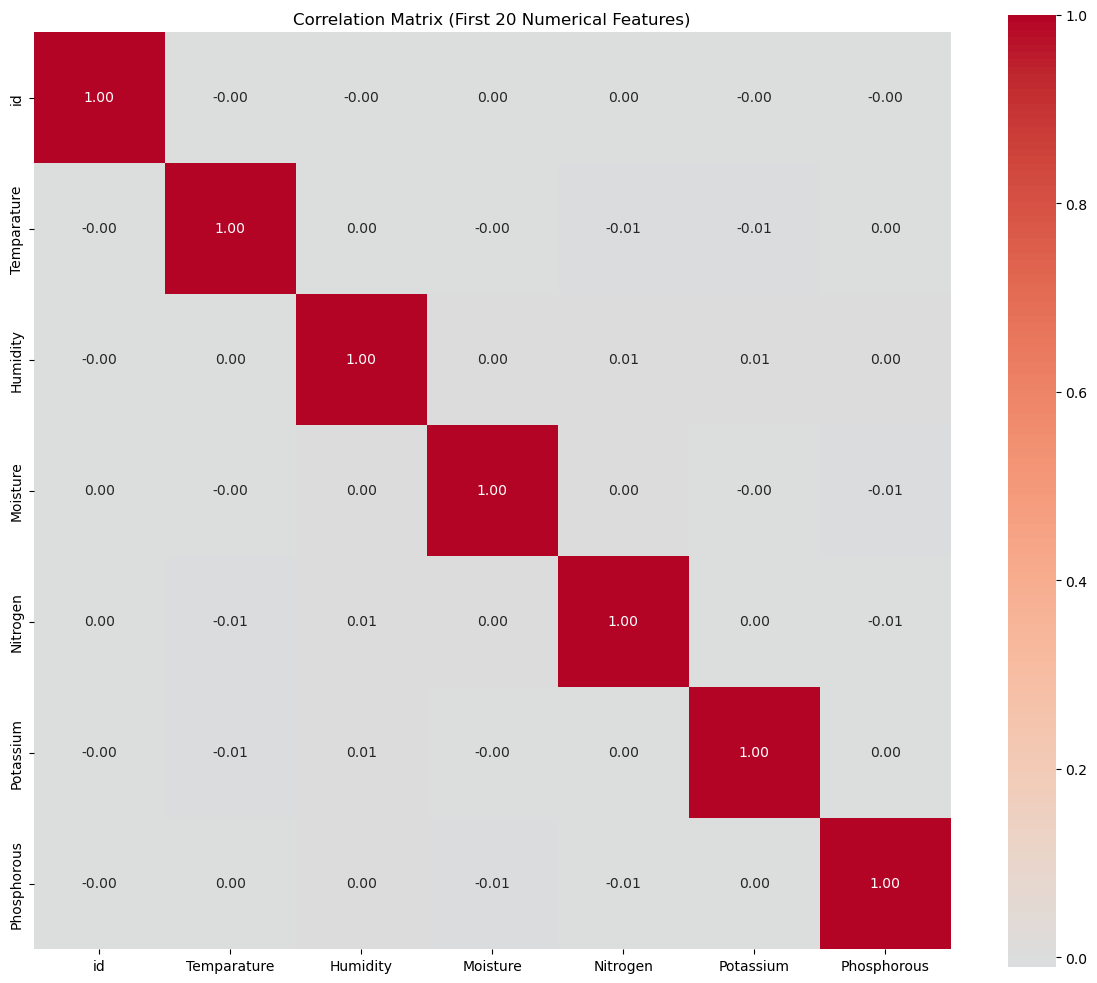

In [7]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
# Calculate correlation matrix for numerical columns
corr_matrix = train_df[numerical_cols].corr()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:  # High correlation threshold
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print("Highly correlated pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.4f}")

if not high_corr_pairs:
    print("No highly correlated pairs found")

# Create correlation heatmap for a subset of features
plt.figure(figsize=(12, 10))
# Select first 20 numerical columns for readability
subset_cols = numerical_cols[:20] if len(numerical_cols) > 20 else numerical_cols
sns.heatmap(train_df[subset_cols].corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix (First 20 Numerical Features)')
plt.tight_layout()
plt.show()


In [8]:
# Detailed analysis of categorical variables
print("=== CATEGORICAL VARIABLE ANALYSIS ===")

# Soil Type analysis
print("Soil Type distribution:")
soil_counts = train_df['Soil Type'].value_counts()
print(soil_counts)
print(f"Soil Type percentages:")
print((soil_counts / len(train_df) * 100).round(2))

# Crop Type analysis
print("\nCrop Type distribution:")
crop_counts = train_df['Crop Type'].value_counts()
print(crop_counts)
print(f"Crop Type percentages:")
print((crop_counts / len(train_df) * 100).round(2))

# Fertilizer Name analysis (target variable)
print("\nFertilizer Name distribution:")
fert_counts = train_df['Fertilizer Name'].value_counts()
print(fert_counts)
print(f"Fertilizer Name percentages:")
print((fert_counts / len(train_df) * 100).round(2))

# Check if this is a balanced classification problem
print(f"\nTarget class balance ratio (min/max): {fert_counts.min()/fert_counts.max():.3f}")
if fert_counts.min()/fert_counts.max() > 0.8:
    print("Dataset is relatively balanced")
elif fert_counts.min()/fert_counts.max() > 0.5:
    print("Dataset has moderate class imbalance")
else:
    print("Dataset has significant class imbalance")


=== CATEGORICAL VARIABLE ANALYSIS ===
Soil Type distribution:
Soil Type
Sandy     156710
Black     150956
Clayey    148382
Red       148102
Loamy     145850
Name: count, dtype: int64
Soil Type percentages:
Soil Type
Sandy     20.89
Black     20.13
Clayey    19.78
Red       19.75
Loamy     19.45
Name: count, dtype: float64

Crop Type distribution:
Crop Type
Paddy          85754
Pulses         78180
Cotton         69171
Tobacco        68000
Wheat          66628
Millets        65291
Barley         65045
Sugarcane      64269
Oil seeds      64184
Maize          62569
Ground Nuts    60909
Name: count, dtype: int64
Crop Type percentages:
Crop Type
Paddy          11.43
Pulses         10.42
Cotton          9.22
Tobacco         9.07
Wheat           8.88
Millets         8.71
Barley          8.67
Sugarcane       8.57
Oil seeds       8.56
Maize           8.34
Ground Nuts     8.12
Name: count, dtype: float64

Fertilizer Name distribution:
Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-1

In [9]:
# Feature relationships with target variable
print("=== FERTILIZER RECOMMENDATION PATTERNS ===")

# Analyze soil type vs fertilizer recommendations
print("Soil Type vs Fertilizer patterns:")
soil_fert_crosstab = pd.crosstab(train_df['Soil Type'], train_df['Fertilizer Name'], normalize='index')
print(soil_fert_crosstab.round(3))

print("\nCrop Type vs Fertilizer patterns:")
crop_fert_crosstab = pd.crosstab(train_df['Crop Type'], train_df['Fertilizer Name'], normalize='index')
print(crop_fert_crosstab.round(3))

# Analyze NPK patterns by fertilizer type
print("\n=== NPK CONTENT ANALYSIS BY FERTILIZER ===")
for fertilizer in train_df['Fertilizer Name'].unique():
    fert_data = train_df[train_df['Fertilizer Name'] == fertilizer]
    print(f"\n{fertilizer}:")
    print(f"  Count: {len(fert_data)}")
    print(f"  Avg N: {fert_data['Nitrogen'].mean():.1f} (std: {fert_data['Nitrogen'].std():.1f})")
    print(f"  Avg P: {fert_data['Phosphorous'].mean():.1f} (std: {fert_data['Phosphorous'].std():.1f})")
    print(f"  Avg K: {fert_data['Potassium'].mean():.1f} (std: {fert_data['Potassium'].std():.1f})")
    
    # Most common soil and crop types for this fertilizer
    most_common_soil = fert_data['Soil Type'].mode().iloc[0]
    most_common_crop = fert_data['Crop Type'].mode().iloc[0]
    print(f"  Most common soil: {most_common_soil}")
    print(f"  Most common crop: {most_common_crop}")


=== FERTILIZER RECOMMENDATION PATTERNS ===
Soil Type vs Fertilizer patterns:
Fertilizer Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Soil Type                                                                
Black               0.153     0.157     0.148  0.144  0.140  0.136  0.123
Clayey              0.159     0.150     0.153  0.152  0.153  0.116  0.116
Loamy               0.156     0.155     0.153  0.152  0.148  0.120  0.117
Red                 0.147     0.154     0.149  0.146  0.146  0.129  0.129
Sandy               0.145     0.148     0.147  0.146  0.153  0.131  0.130

Crop Type vs Fertilizer patterns:
Fertilizer Name  10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
Crop Type                                                                
Barley              0.145     0.151     0.152  0.146  0.149  0.124  0.133
Cotton              0.148     0.144     0.149  0.145  0.143  0.136  0.136
Ground Nuts         0.149     0.157     0.155  0.153  0.160  0.112  0.114


=== ENVIRONMENTAL CONDITIONS ANALYSIS ===
Temperature patterns by fertilizer:
                  mean   std  min  max
Fertilizer Name                       
10-26-26         31.47  4.04   25   38
14-35-14         31.54  4.00   25   38
17-17-17         31.46  4.03   25   38
20-20            31.51  4.03   25   38
28-28            31.52  4.03   25   38
DAP              31.51  4.05   25   38
Urea             31.51  4.00   25   38

Humidity patterns by fertilizer:
                  mean   std  min  max
Fertilizer Name                       
10-26-26         60.94  6.64   50   72
14-35-14         60.96  6.64   50   72
17-17-17         61.00  6.61   50   72
20-20            61.10  6.66   50   72
28-28            61.01  6.65   50   72
DAP              61.16  6.67   50   72
Urea             61.14  6.65   50   72

Moisture patterns by fertilizer:
                  mean    std  min  max
Fertilizer Name                        
10-26-26         45.08  11.79   25   65
14-35-14         45.10  11.79   

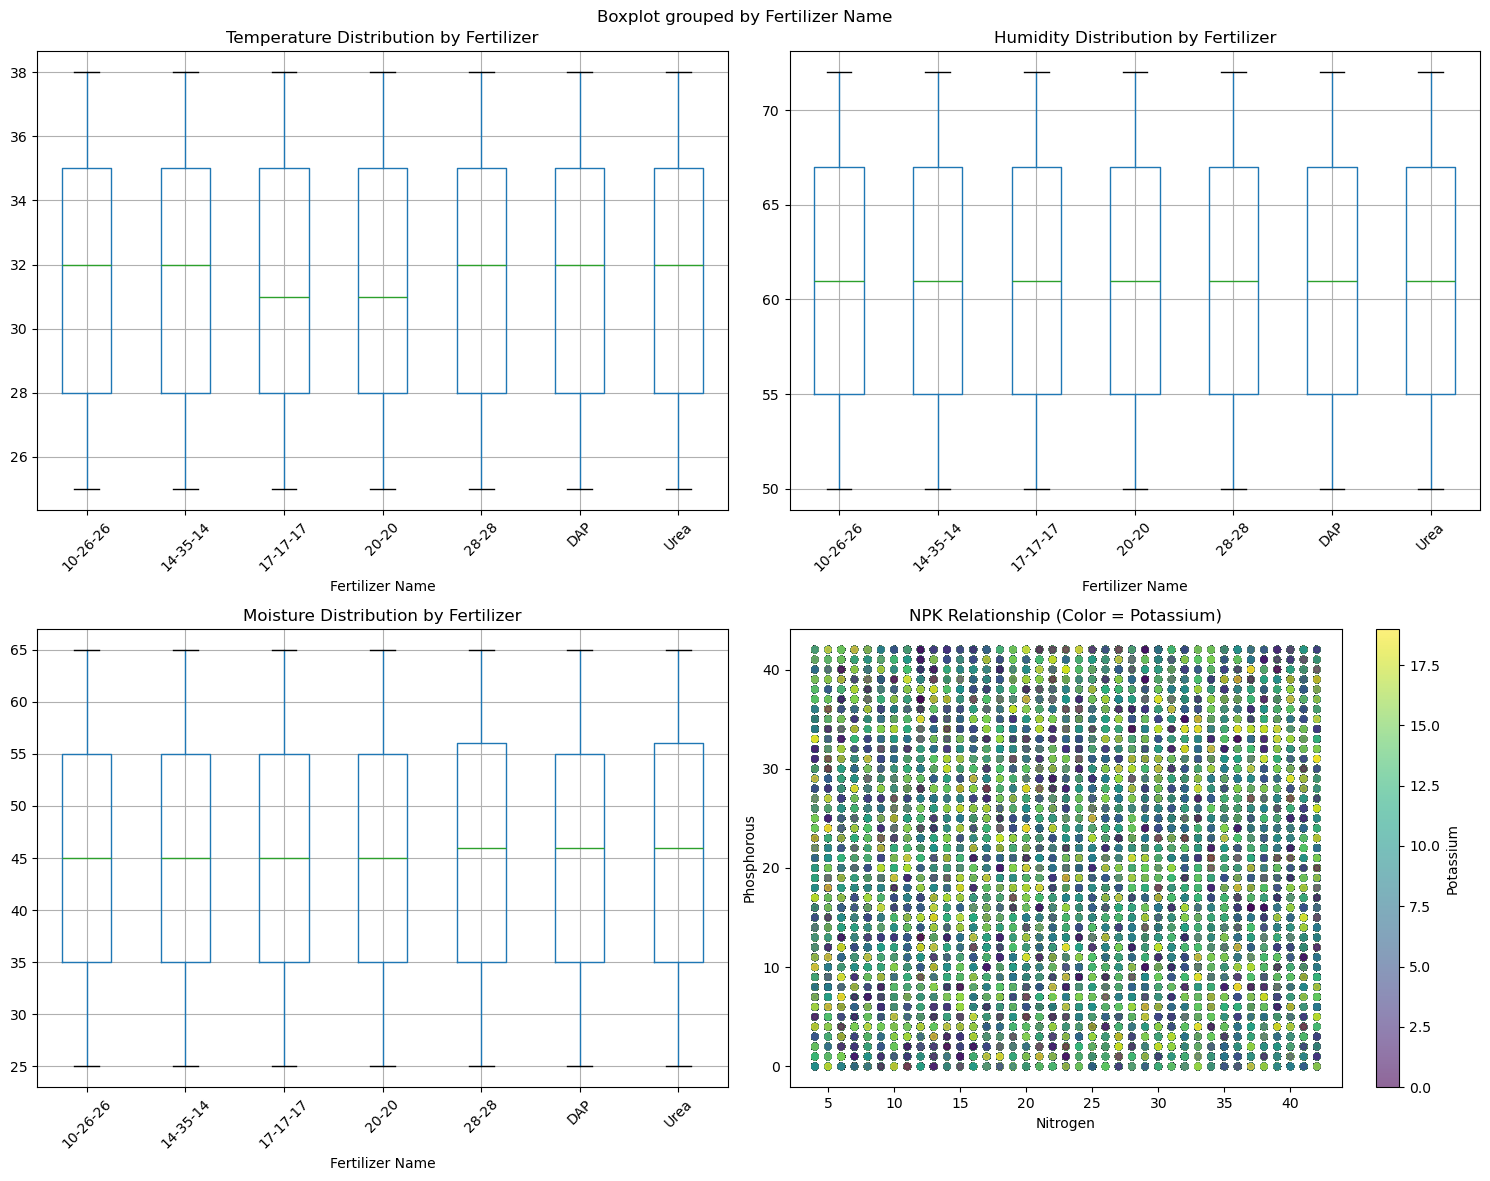

In [10]:
# Environmental conditions analysis
print("=== ENVIRONMENTAL CONDITIONS ANALYSIS ===")

# Temperature analysis by fertilizer
print("Temperature patterns by fertilizer:")
temp_by_fert = train_df.groupby('Fertilizer Name')['Temparature'].agg(['mean', 'std', 'min', 'max'])
print(temp_by_fert.round(2))

print("\nHumidity patterns by fertilizer:")
humidity_by_fert = train_df.groupby('Fertilizer Name')['Humidity'].agg(['mean', 'std', 'min', 'max'])
print(humidity_by_fert.round(2))

print("\nMoisture patterns by fertilizer:")
moisture_by_fert = train_df.groupby('Fertilizer Name')['Moisture'].agg(['mean', 'std', 'min', 'max'])
print(moisture_by_fert.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Temperature distribution by fertilizer
train_df.boxplot(column='Temparature', by='Fertilizer Name', ax=axes[0,0])
axes[0,0].set_title('Temperature Distribution by Fertilizer')
axes[0,0].set_xlabel('Fertilizer Name')
axes[0,0].tick_params(axis='x', rotation=45)

# Humidity distribution by fertilizer
train_df.boxplot(column='Humidity', by='Fertilizer Name', ax=axes[0,1])
axes[0,1].set_title('Humidity Distribution by Fertilizer')
axes[0,1].set_xlabel('Fertilizer Name')
axes[0,1].tick_params(axis='x', rotation=45)

# Moisture distribution by fertilizer
train_df.boxplot(column='Moisture', by='Fertilizer Name', ax=axes[1,0])
axes[1,0].set_title('Moisture Distribution by Fertilizer')
axes[1,0].set_xlabel('Fertilizer Name')
axes[1,0].tick_params(axis='x', rotation=45)

# NPK relationship
train_df.plot.scatter(x='Nitrogen', y='Phosphorous', c='Potassium', 
                     colormap='viridis', alpha=0.6, ax=axes[1,1])
axes[1,1].set_title('NPK Relationship (Color = Potassium)')

plt.tight_layout()
plt.show()


=== ADVANCED PATTERN ANALYSIS ===
Feature Mutual Information with Target:
       Feature  Mutual_Information
3    Soil Type            0.005766
4    Crop Type            0.003931
2     Moisture            0.003612
6    Potassium            0.003034
0  Temparature            0.002818
7  Phosphorous            0.002688
5     Nitrogen            0.002537
1     Humidity            0.002179


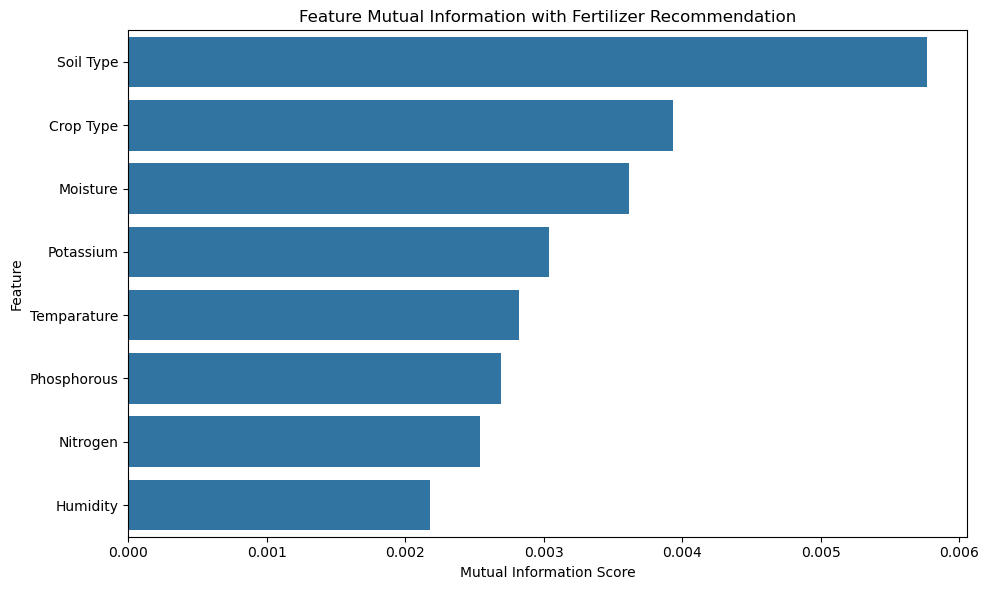

In [11]:
# Advanced pattern analysis
print("=== ADVANCED PATTERN ANALYSIS ===")

# Feature importance through mutual information
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Prepare data for mutual information
X_encoded = train_df.drop(['id', 'Fertilizer Name'], axis=1).copy()

# Encode categorical variables
le_soil = LabelEncoder()
le_crop = LabelEncoder()
X_encoded['Soil Type'] = le_soil.fit_transform(X_encoded['Soil Type'])
X_encoded['Crop Type'] = le_crop.fit_transform(X_encoded['Crop Type'])

# Encode target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(train_df['Fertilizer Name'])

# Calculate mutual information
mi_scores = mutual_info_classif(X_encoded, y_encoded, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Mutual_Information': mi_scores
}).sort_values('Mutual_Information', ascending=False)

print("Feature Mutual Information with Target:")
print(mi_df)

# Visualize mutual information
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='Mutual_Information', y='Feature')
plt.title('Feature Mutual Information with Fertilizer Recommendation')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()


In [12]:
# Discover fertilizer recommendation rules
print("=== FERTILIZER RECOMMENDATION RULES DISCOVERY ===")

# Analyze decision patterns for each fertilizer
def analyze_fertilizer_conditions(fertilizer_name):
    fert_data = train_df[train_df['Fertilizer Name'] == fertilizer_name]
    
    print(f"\n{fertilizer_name} Recommendation Conditions:")
    print(f"  Sample size: {len(fert_data)}")
    
    # Environmental conditions
    print(f"  Temperature range: {fert_data['Temparature'].min()}-{fert_data['Temparature'].max()}°C")
    print(f"  Humidity range: {fert_data['Humidity'].min()}-{fert_data['Humidity'].max()}%")
    print(f"  Moisture range: {fert_data['Moisture'].min()}-{fert_data['Moisture'].max()}%")
    
    # NPK conditions
    print(f"  Nitrogen range: {fert_data['Nitrogen'].min()}-{fert_data['Nitrogen'].max()}")
    print(f"  Phosphorous range: {fert_data['Phosphorous'].min()}-{fert_data['Phosphorous'].max()}")
    print(f"  Potassium range: {fert_data['Potassium'].min()}-{fert_data['Potassium'].max()}")
    
    # Soil and crop preferences
    soil_dist = fert_data['Soil Type'].value_counts()
    crop_dist = fert_data['Crop Type'].value_counts()
    
    print(f"  Primary soil types: {soil_dist.head(3).to_dict()}")
    print(f"  Primary crop types: {crop_dist.head(3).to_dict()}")
    
    return fert_data

# Analyze each fertilizer
fertilizer_analysis = {}
for fertilizer in sorted(train_df['Fertilizer Name'].unique()):
    fertilizer_analysis[fertilizer] = analyze_fertilizer_conditions(fertilizer)


=== FERTILIZER RECOMMENDATION RULES DISCOVERY ===

10-26-26 Recommendation Conditions:
  Sample size: 113887
  Temperature range: 25-38°C
  Humidity range: 50-72%
  Moisture range: 25-65%
  Nitrogen range: 4-42
  Phosphorous range: 0-42
  Potassium range: 0-19
  Primary soil types: {'Clayey': 23592, 'Black': 23061, 'Loamy': 22822}
  Primary crop types: {'Paddy': 12812, 'Pulses': 12090, 'Tobacco': 10522}

14-35-14 Recommendation Conditions:
  Sample size: 114436
  Temperature range: 25-38°C
  Humidity range: 50-72%
  Moisture range: 25-65%
  Nitrogen range: 4-42
  Phosphorous range: 0-42
  Potassium range: 0-19
  Primary soil types: {'Black': 23656, 'Sandy': 23172, 'Red': 22779}
  Primary crop types: {'Pulses': 13064, 'Paddy': 12651, 'Sugarcane': 10410}

17-17-17 Recommendation Conditions:
  Sample size: 112453
  Temperature range: 25-38°C
  Humidity range: 50-72%
  Moisture range: 25-65%
  Nitrogen range: 4-42
  Phosphorous range: 0-42
  Potassium range: 0-19
  Primary soil types: {'Sa

=== TRAIN VS TEST DATASET COMPARISON ===
Statistical comparison (Train vs Test):
       Temparature_train  Temparature_test  Humidity_train  Humidity_test  \
count          750000.00         250000.00       750000.00      250000.00   
mean               31.50             31.49           61.04          61.05   
std                 4.03              4.02            6.65           6.64   
min                25.00             25.00           50.00          50.00   
25%                28.00             28.00           55.00          55.00   
50%                32.00             31.00           61.00          61.00   
75%                35.00             35.00           67.00          67.00   
max                38.00             38.00           72.00          72.00   

       Moisture_train  Moisture_test  Nitrogen_train  Nitrogen_test  \
count       750000.00      250000.00       750000.00      250000.00   
mean            45.18          45.19           23.09          23.14   
std         

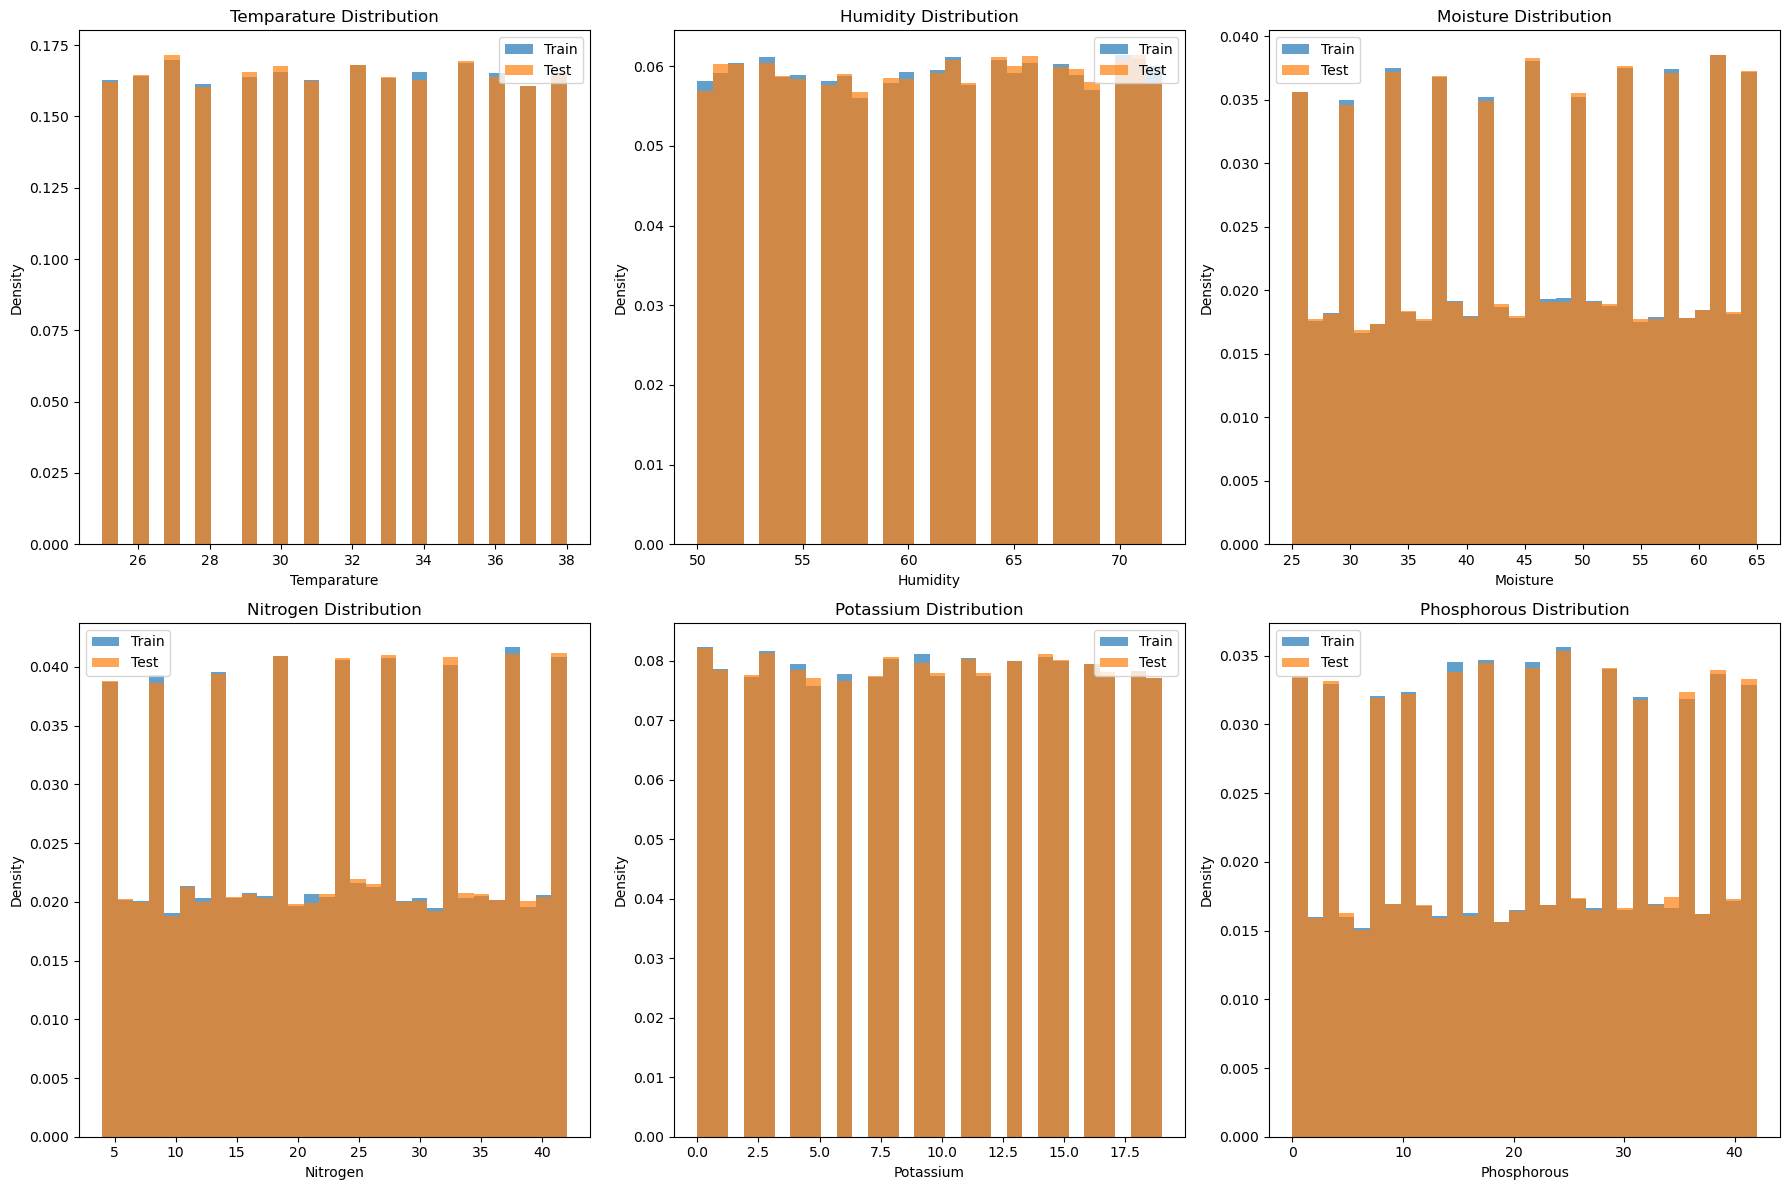

In [13]:
# Test dataset comparison
print("=== TRAIN VS TEST DATASET COMPARISON ===")

# Compare feature distributions between train and test
features_to_compare = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

print("Statistical comparison (Train vs Test):")
comparison_stats = pd.DataFrame()
for feature in features_to_compare:
    train_stats = train_df[feature].describe()
    test_stats = test_df[feature].describe()
    
    comparison_stats[f'{feature}_train'] = train_stats
    comparison_stats[f'{feature}_test'] = test_stats

print(comparison_stats.round(2))

# Check categorical distributions
print("\nSoil Type distribution comparison:")
print("Train:", train_df['Soil Type'].value_counts().sort_index())
print("Test:", test_df['Soil Type'].value_counts().sort_index())

print("\nCrop Type distribution comparison:")
print("Train:", train_df['Crop Type'].value_counts().sort_index())
print("Test:", test_df['Crop Type'].value_counts().sort_index())

# Visualize distribution comparisons
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(features_to_compare):
    axes[i].hist(train_df[feature], alpha=0.7, label='Train', bins=30, density=True)
    axes[i].hist(test_df[feature], alpha=0.7, label='Test', bins=30, density=True)
    axes[i].set_title(f'{feature} Distribution')
    axes[i].legend()
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()
